In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statistics as st
%matplotlib inline
pd.pandas.set_option("display.max_columns",None)

In [2]:
data = pd.read_csv("Jan_2020_ontime.csv")

In [3]:
data.drop('Unnamed: 21',axis=1,inplace=True)

In [4]:
data.head()

,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,OP_CARRIER_AIRLINE_ID,OP_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN,DEST_AIRPORT_ID,DEST_AIRPORT_SEQ_ID,DEST,DEP_TIME,DEP_DEL15,DEP_TIME_BLK,ARR_TIME,ARR_DEL15,CANCELLED,DIVERTED,DISTANCE
0,1,3,EV,20366,EV,N48901,4397,13930,1393007,ORD,11977,1197705,GRB,1003.0,0.0,1000-1059,1117.0,0.0,0.0,0.0,174.0
1,1,3,EV,20366,EV,N16976,4401,15370,1537002,TUL,13930,1393007,ORD,1027.0,0.0,1000-1059,1216.0,0.0,0.0,0.0,585.0
2,1,3,EV,20366,EV,N12167,4404,11618,1161802,EWR,15412,1541205,TYS,1848.0,0.0,1800-1859,2120.0,0.0,0.0,0.0,631.0
3,1,3,EV,20366,EV,N14902,4405,10781,1078105,BTR,12266,1226603,IAH,1846.0,0.0,1800-1859,2004.0,0.0,0.0,0.0,253.0
4,1,3,EV,20366,EV,N606UX,4407,14524,1452401,RIC,12266,1226603,IAH,1038.0,0.0,1000-1059,1330.0,0.0,0.0,0.0,1157.0


In [5]:
data.shape

(607346, 21)

In [6]:
# ## in data analysis we will analyse to find below stuff

# 1.missing value
# 2.All the numerical variables
# 3.distribution of the numerical varibles
# 4.categrorical variables
# 5.outliers
# 6.relationship  between independent and dependent features

In [7]:
#missing values
data.isnull().sum()

DAY_OF_MONTH                0
DAY_OF_WEEK                 0
OP_UNIQUE_CARRIER           0
OP_CARRIER_AIRLINE_ID       0
OP_CARRIER                  0
TAIL_NUM                  698
OP_CARRIER_FL_NUM           0
ORIGIN_AIRPORT_ID           0
ORIGIN_AIRPORT_SEQ_ID       0
ORIGIN                      0
DEST_AIRPORT_ID             0
DEST_AIRPORT_SEQ_ID         0
DEST                        0
DEP_TIME                 6664
DEP_DEL15                6699
DEP_TIME_BLK                0
ARR_TIME                 7075
ARR_DEL15                8078
CANCELLED                   0
DIVERTED                    0
DISTANCE                    0
dtype: int64

In [8]:
#anathor method
[i for i in data.columns if data[i].isnull().sum() >= 1]

['TAIL_NUM', 'DEP_TIME', 'DEP_DEL15', 'ARR_TIME', 'ARR_DEL15']

In [9]:
# fatching nan colums
feature_nan = list(data.columns[data.isnull().sum() >= 1])

In [10]:
for i in feature_nan:
    print(i,np.round(data[i].isnull().mean()*100,4),"%missing values")

TAIL_NUM 0.1149 %missing values
DEP_TIME 1.0972 %missing values
DEP_DEL15 1.103 %missing values
ARR_TIME 1.1649 %missing values
ARR_DEL15 1.33 %missing values


In [11]:
# another method missing value percentage
np.round(data[feature_nan].isnull().mean()*100,4)

TAIL_NUM     0.1149
DEP_TIME     1.0972
DEP_DEL15    1.1030
ARR_TIME     1.1649
ARR_DEL15    1.3300
dtype: float64

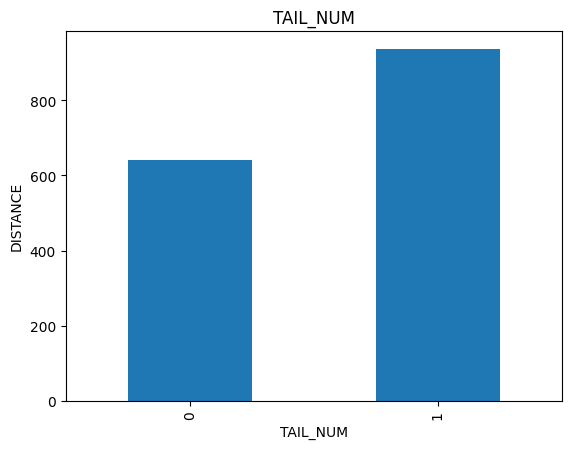

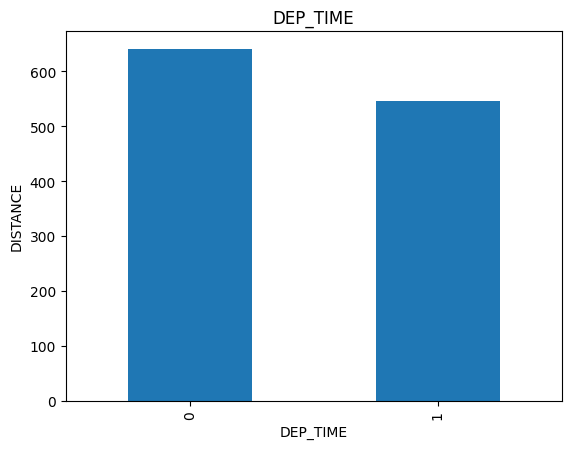

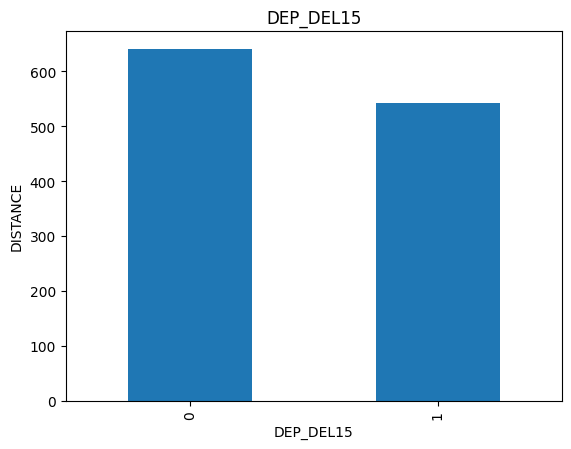

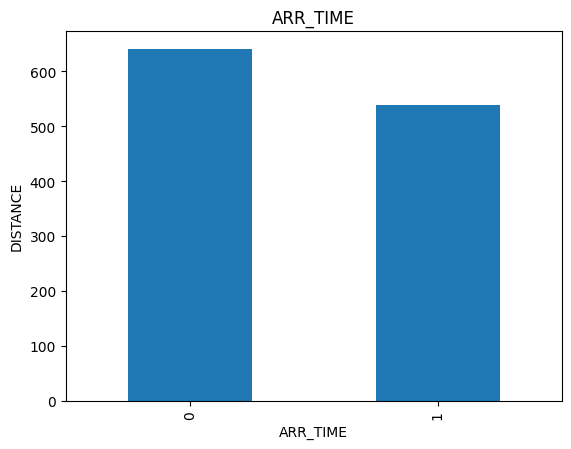

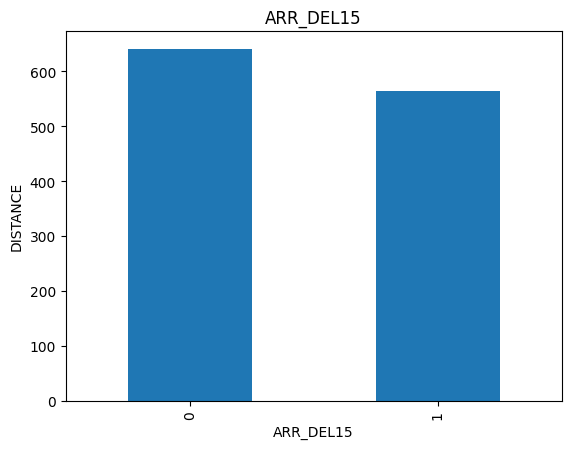

In [12]:
## ploting nan value with distance and see relationship
df = data.copy()
for i in feature_nan:
     # lets make variable  thats  indicates 1 if the obeservation was missing or zero
        df[i] = np.where(df[i].isnull(),1,0)
        df.groupby(i)["DISTANCE"].median().plot.bar()
        plt.xlabel(i)
        plt.ylabel("DISTANCE")
        plt.title(i)
        plt.show()
    

here with the relationship betewwn missing values and the dependent variable is clearly visible.So We need to replace these nan values with smothing meaningfull which do in the feature engenerring seaction

In [13]:
# Numerical variable
numerical_features = data[data.dtypes[data.dtypes != "object"].index]

In [14]:
len(numerical_features)

607346

In [15]:
numerical_features.head()

,DAY_OF_MONTH,DAY_OF_WEEK,OP_CARRIER_AIRLINE_ID,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,DEST_AIRPORT_ID,DEST_AIRPORT_SEQ_ID,DEP_TIME,DEP_DEL15,ARR_TIME,ARR_DEL15,CANCELLED,DIVERTED,DISTANCE
0,1,3,20366,4397,13930,1393007,11977,1197705,1003.0,0.0,1117.0,0.0,0.0,0.0,174.0
1,1,3,20366,4401,15370,1537002,13930,1393007,1027.0,0.0,1216.0,0.0,0.0,0.0,585.0
2,1,3,20366,4404,11618,1161802,15412,1541205,1848.0,0.0,2120.0,0.0,0.0,0.0,631.0
3,1,3,20366,4405,10781,1078105,12266,1226603,1846.0,0.0,2004.0,0.0,0.0,0.0,253.0
4,1,3,20366,4407,14524,1452401,12266,1226603,1038.0,0.0,1330.0,0.0,0.0,0.0,1157.0


In [16]:
# Tempora; variables(EG: Date, time variable)
# fatch time feature 
time_feature = [i for i in numerical_features if "TI" in i or "TIME" in i]

In [17]:
for i in time_feature:
    print(i,df[i].unique())

DEP_TIME [0 1]
ARR_TIME [0 1]


<AxesSubplot:xlabel='DEP_TIME'>

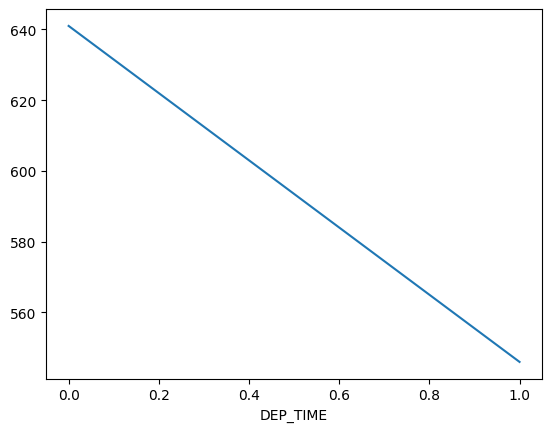

In [18]:
df.groupby("DEP_TIME")["DISTANCE"].median().plot()

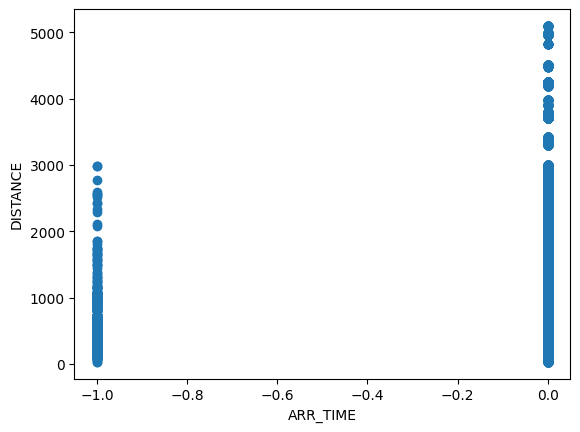

In [19]:
for i in time_feature:
    if i != "DEP_TIME":
        df[i] = df["DEP_TIME"]-df[i]
        plt.scatter(df[i],df["DISTANCE"])
        
        plt.xlabel(i)
        plt.ylabel("DISTANCE")
        plt.show()
        

In [20]:
## numerical vdriable 2type
## continuous variable and discrit variable
discrit_features = [i for i in numerical_features if len(data[i].unique()) <= 25]

In [21]:
len(discrit_features)

6

In [22]:
data[discrit_features].head()

,DAY_OF_WEEK,OP_CARRIER_AIRLINE_ID,DEP_DEL15,ARR_DEL15,CANCELLED,DIVERTED
0,3,20366,0.0,0.0,0.0,0.0
1,3,20366,0.0,0.0,0.0,0.0
2,3,20366,0.0,0.0,0.0,0.0
3,3,20366,0.0,0.0,0.0,0.0
4,3,20366,0.0,0.0,0.0,0.0


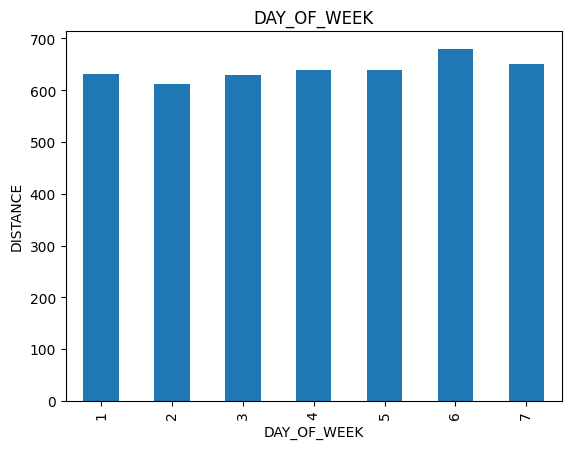

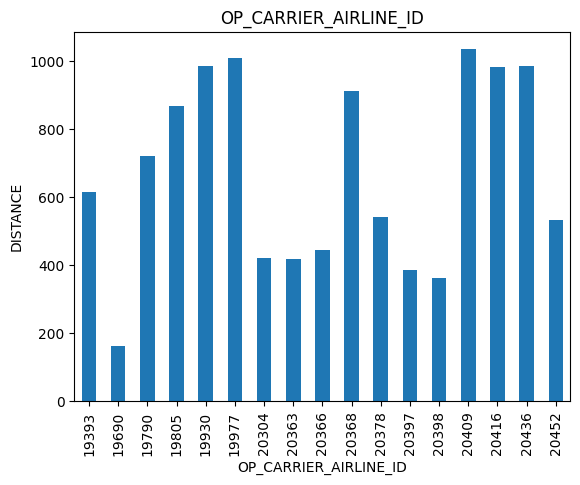

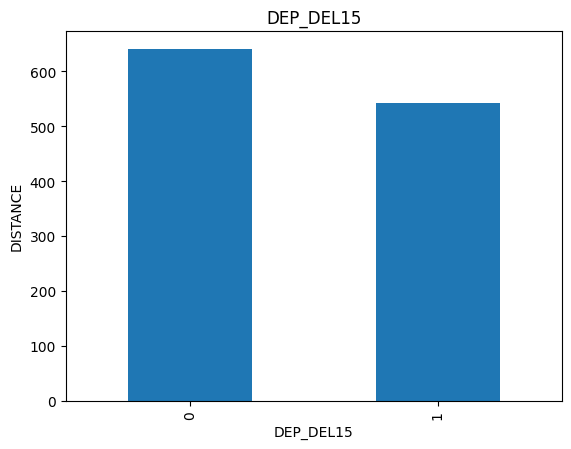

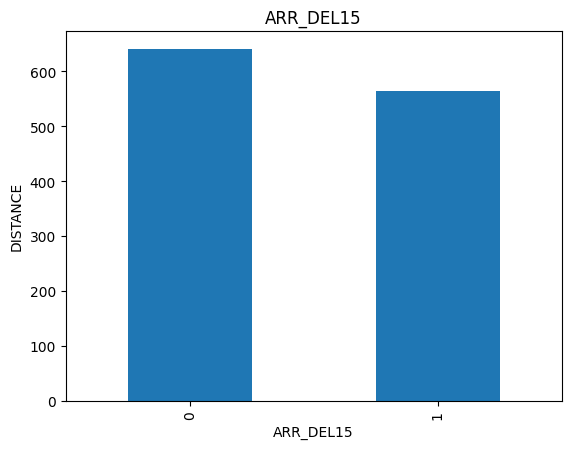

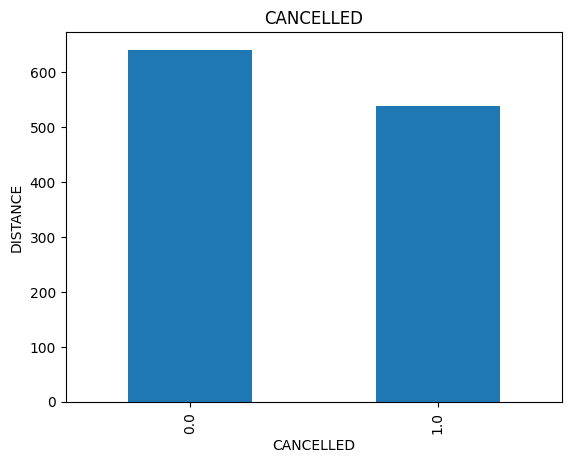

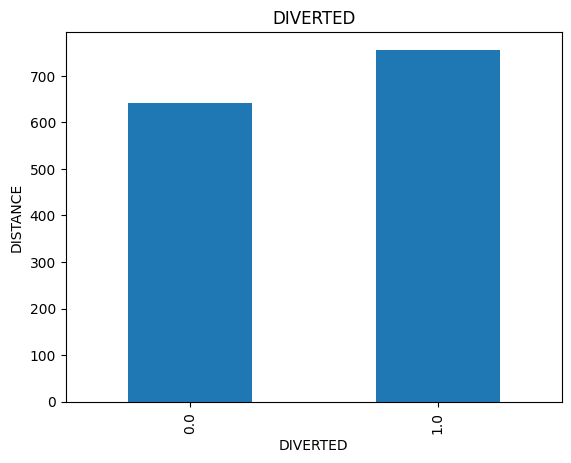

In [23]:
for i in discrit_features:
    df.groupby(i)["DISTANCE"].median().plot.bar()
    plt.xlabel(i)
    plt.ylabel("DISTANCE")
    plt.title(i)
    plt.show()
    

In [24]:
# continous variable
continous_feature = [i for i in  numerical_features if i not in discrit_features+time_feature]

In [25]:
len(continous_feature)

7

In [26]:
continous_feature

['DAY_OF_MONTH',
 'OP_CARRIER_FL_NUM',
 'ORIGIN_AIRPORT_ID',
 'ORIGIN_AIRPORT_SEQ_ID',
 'DEST_AIRPORT_ID',
 'DEST_AIRPORT_SEQ_ID',
 'DISTANCE']

In [27]:
data[continous_feature].head()

,DAY_OF_MONTH,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,DEST_AIRPORT_ID,DEST_AIRPORT_SEQ_ID,DISTANCE
0,1,4397,13930,1393007,11977,1197705,174.0
1,1,4401,15370,1537002,13930,1393007,585.0
2,1,4404,11618,1161802,15412,1541205,631.0
3,1,4405,10781,1078105,12266,1226603,253.0
4,1,4407,14524,1452401,12266,1226603,1157.0


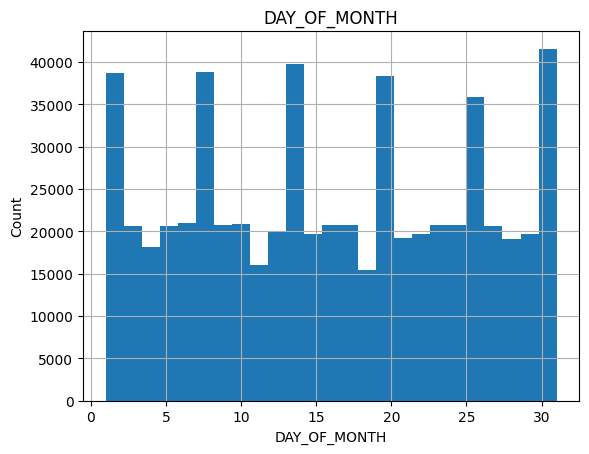

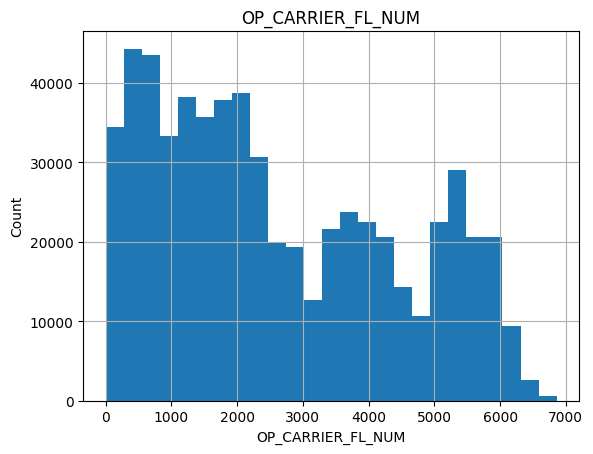

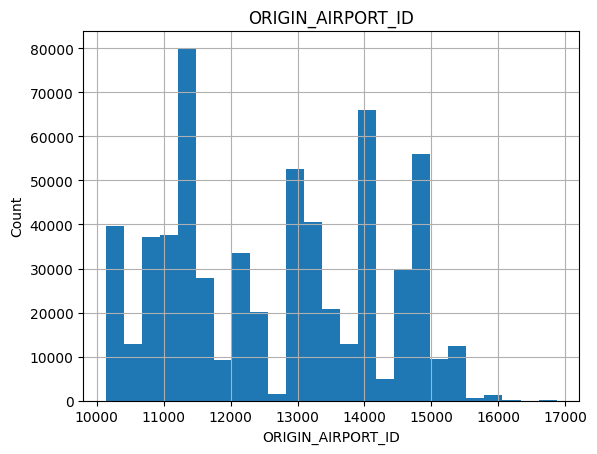

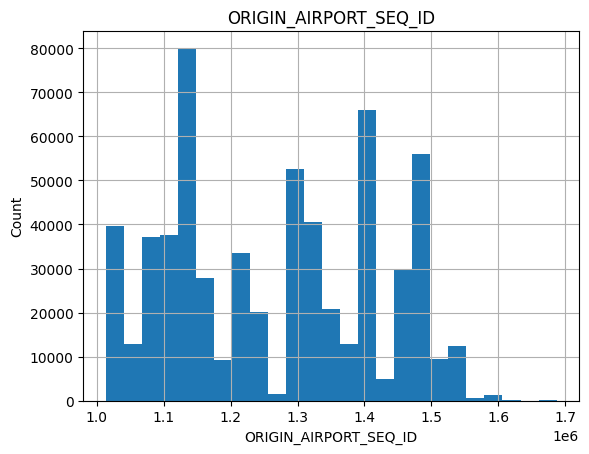

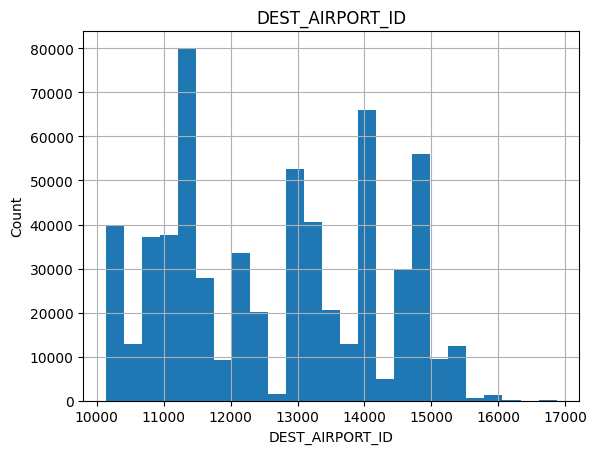

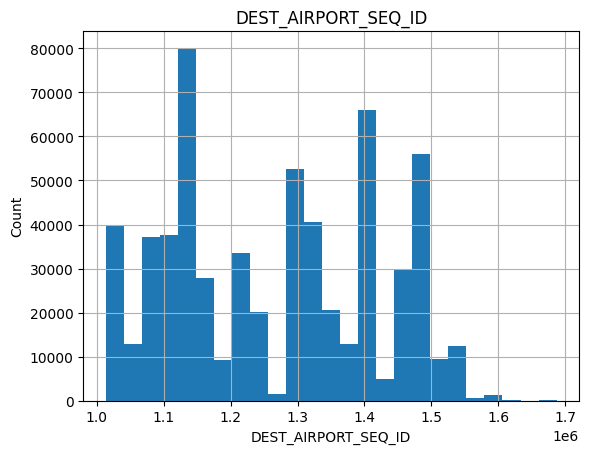

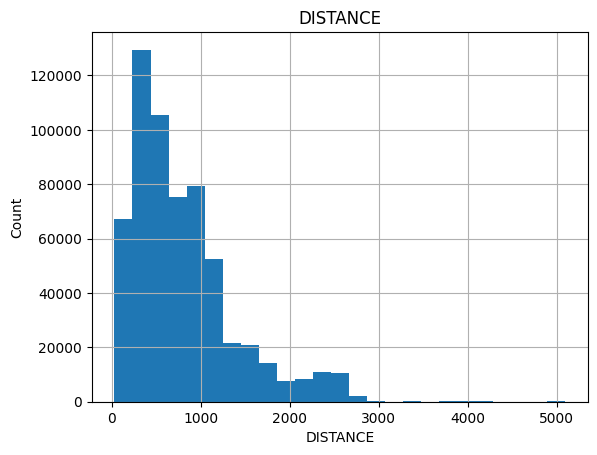

In [28]:
for i in continous_feature:
    df[i].hist(bins=25)
    plt.xlabel(i)
    plt.ylabel("Count")
    plt.title(i)
    plt.show()
    

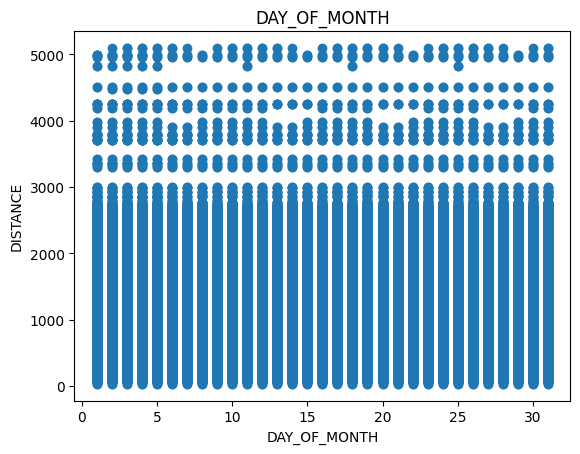

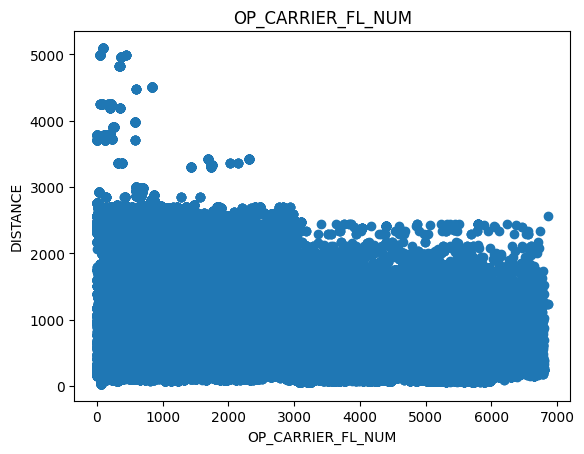

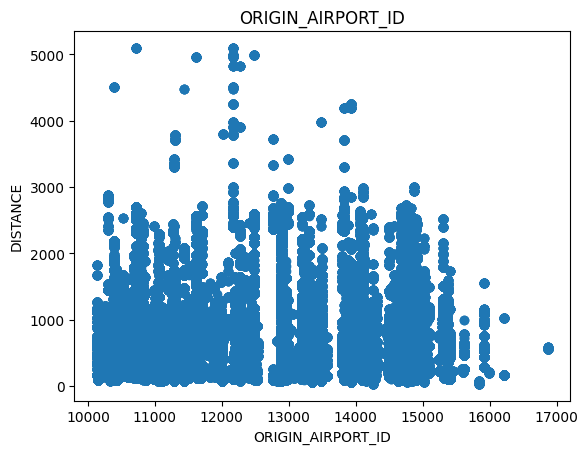

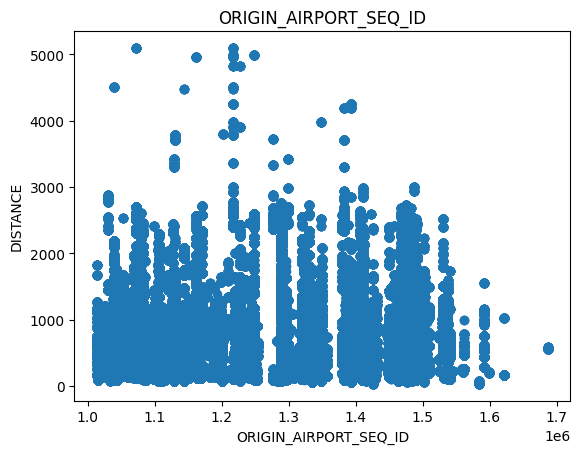

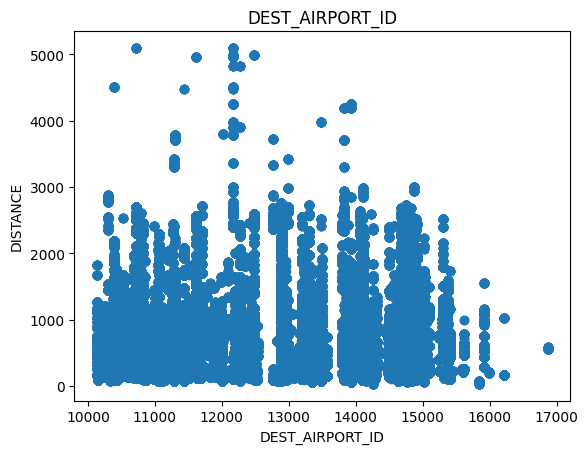

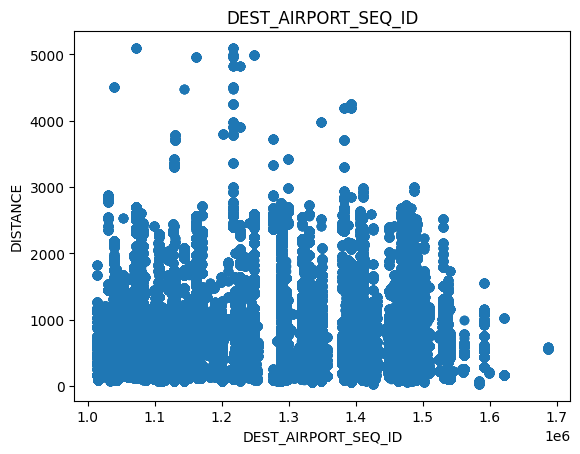

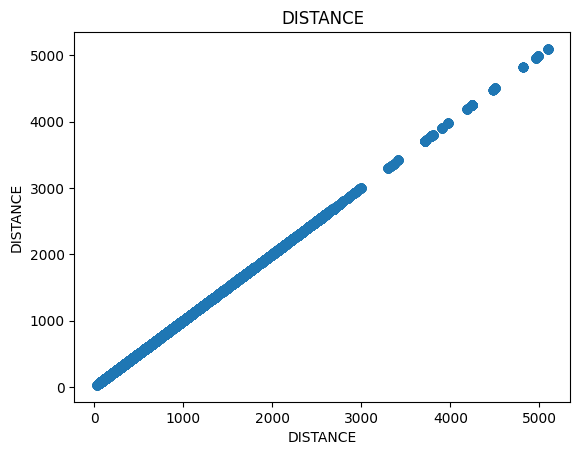

In [29]:
# well be using logrethemic transformation
for i in continous_feature:
    if 0 in df[i].unique():
        pass
    else:
        df[i] = np.log(df[i])
        plt.scatter(data[i],data["DISTANCE"])
        plt.xlabel(i)
        plt.ylabel("DISTANCE")
        plt.title(i)
        plt.show()
        

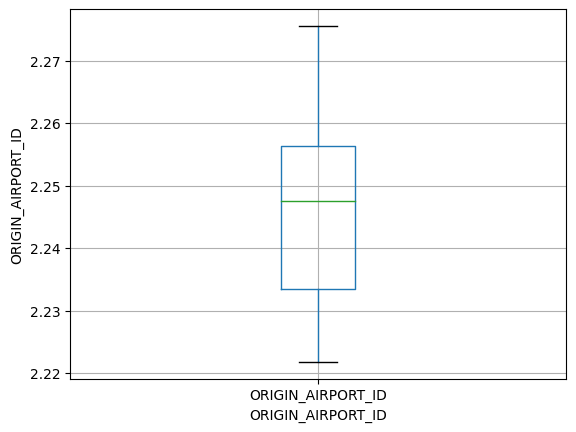

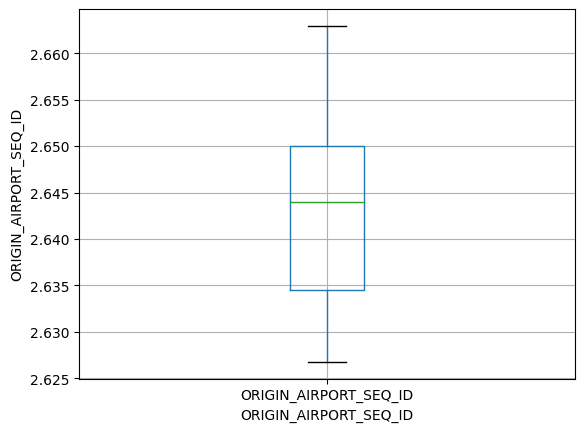

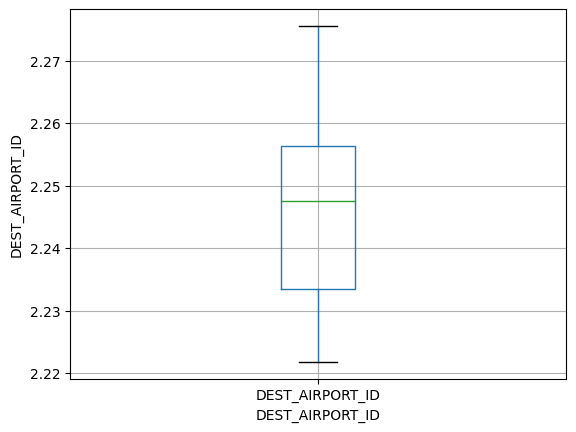

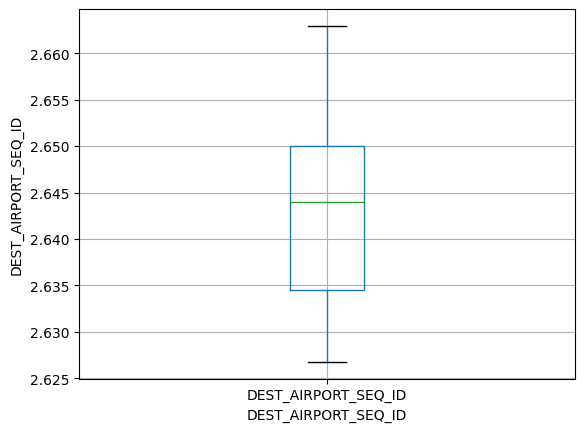

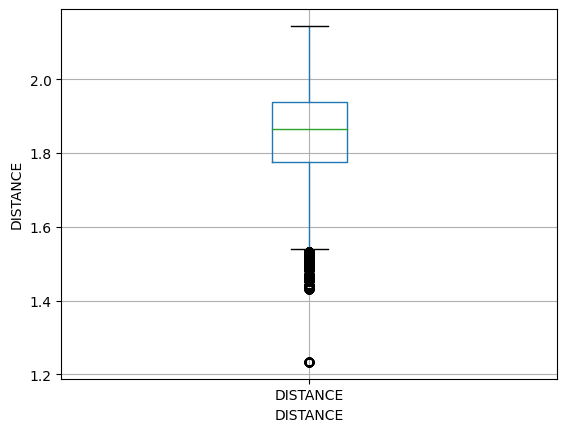

In [30]:
# find outlier
for i in continous_feature:
    if 0 in df[i].unique():
        pass
    else:
        df[i]= np.log(df[i])
        df.boxplot(column=i)
        plt.xlabel(i)
        plt.ylabel(i)    
        plt.show()

<AxesSubplot:xlabel='DISTANCE', ylabel='Count'>

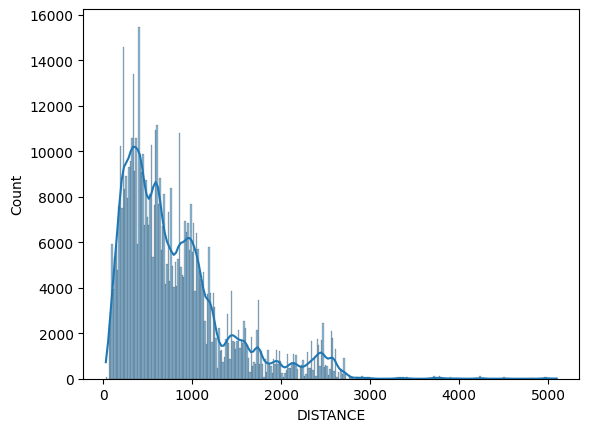

In [31]:
sns.histplot(data["DISTANCE"],kde=True)

In [32]:
# catiogerical variable
categorical_features = data[data.dtypes[data.dtypes == "object"].index]

In [33]:
categorical_features.head()

,OP_UNIQUE_CARRIER,OP_CARRIER,TAIL_NUM,ORIGIN,DEST,DEP_TIME_BLK
0,EV,EV,N48901,ORD,GRB,1000-1059
1,EV,EV,N16976,TUL,ORD,1000-1059
2,EV,EV,N12167,EWR,TYS,1800-1859
3,EV,EV,N14902,BTR,IAH,1800-1859
4,EV,EV,N606UX,RIC,IAH,1000-1059


In [34]:
for i in categorical_features:
    print("the features names is {} and the number of catagories are {}".format(i,len(data[i].unique())))

the features names is OP_UNIQUE_CARRIER and the number of catagories are 17
the features names is OP_CARRIER and the number of catagories are 17
the features names is TAIL_NUM and the number of catagories are 5445
the features names is ORIGIN and the number of catagories are 351
the features names is DEST and the number of catagories are 350
the features names is DEP_TIME_BLK and the number of catagories are 19


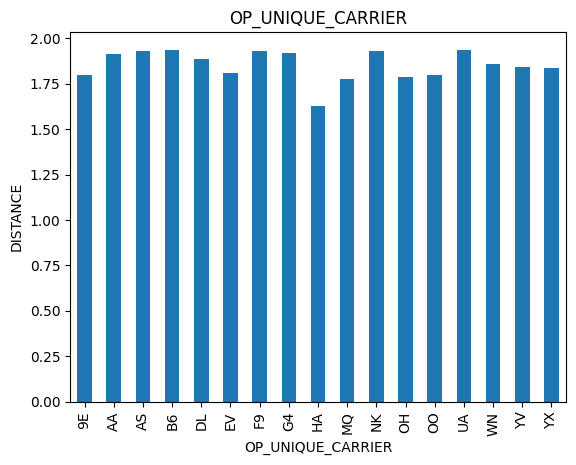

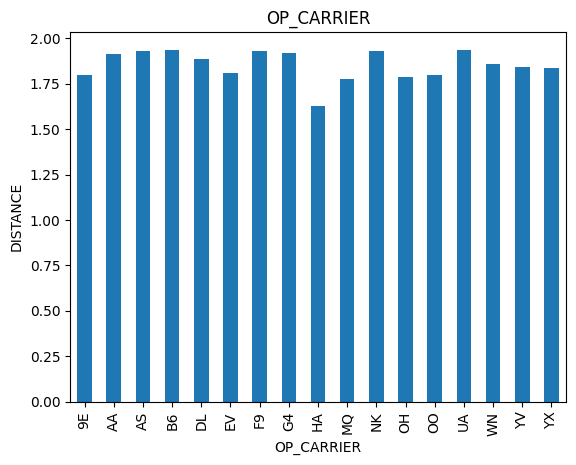

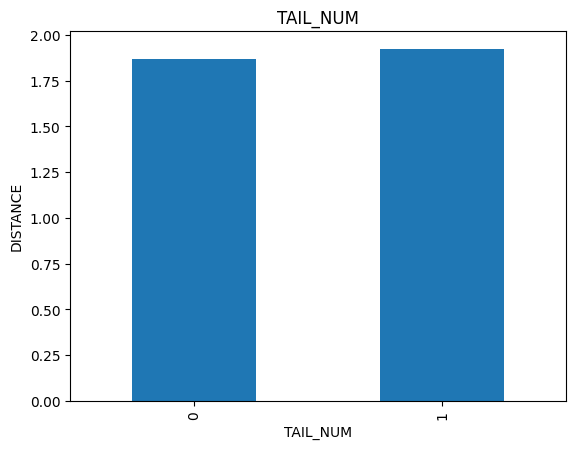

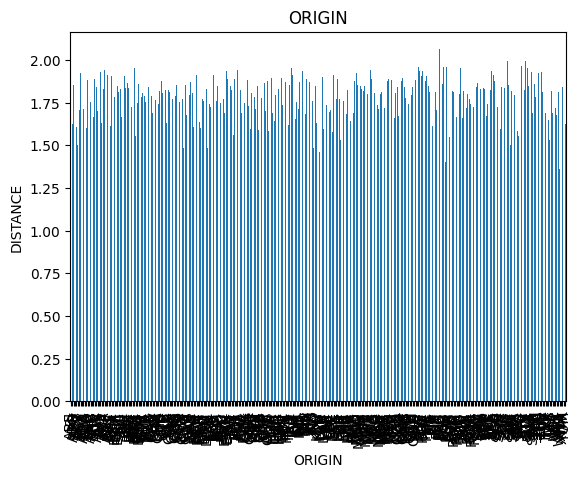

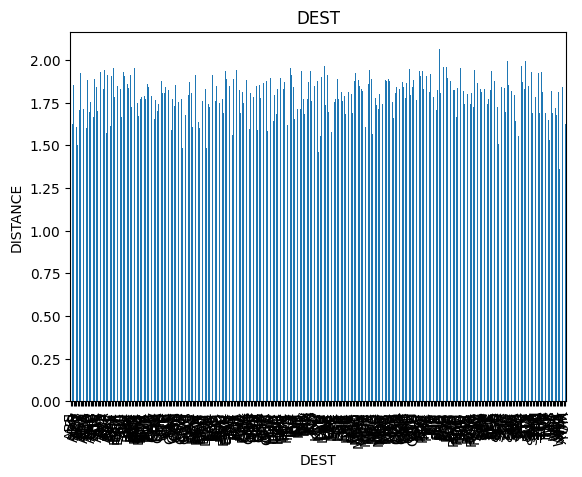

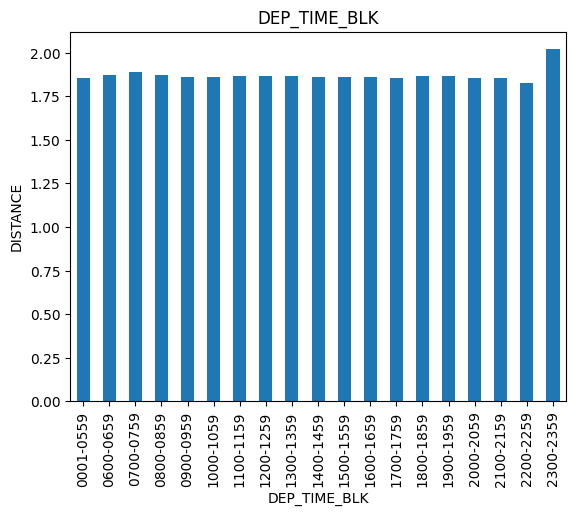

In [35]:
# find relationship between catogrtical  and SalePrice
for i in categorical_features:
    df.groupby(i)["DISTANCE"].median().plot.bar()
    plt.xlabel(i)
    plt.ylabel("DISTANCE")
    plt.title(i)
    plt.show()
    